In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
import pandas as pd
import numpy as np

#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [ ]:
file_path = "/gdrive/MyDrive/ssac_bigdata/data/raw_sales.csv"
df = pd.read_csv(file_path, names = ['day', 'post_code','price','property_type','bedrooms'], skiprows=1)
df.tail()

,day,post_code,price,property_type,bedrooms
29575,2019. 7. 25,2900,500000,unit,3
29576,2019. 7. 25,2612,560000,unit,2
29577,2019. 7. 26,2912,464950,unit,2
29578,2019. 7. 26,2601,589000,unit,2
29579,2019. 7. 26,2612,775000,unit,2


In [ ]:
df = df.drop(['post_code','property_type'], axis=1)

In [ ]:
df = df[df.bedrooms == 4]
df.drop('bedrooms', axis=1, inplace=True)

# 시계열 날짜 타입 바꾸기
df['day'] = pd.to_datetime(df['day'])
print(df.info())

# index를 day로
df.index = df['day'] # 복사
df.set_index('day', inplace=True)
df.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10442 entries, 0 to 29421
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     10442 non-null  datetime64[ns]
 1   price   10442 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 244.7 KB
None


,price
day,
2007-02-07,525000


In [ ]:
# 예측값과 맞출 정답지 뽑기
train_df = df.iloc[:10412]
train_df.head(1)

,price
day,
2007-02-07,525000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10412 entries, 2007-02-07 to 2012-05-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   10412 non-null  int64
dtypes: int64(1)
memory usage: 162.7 KB


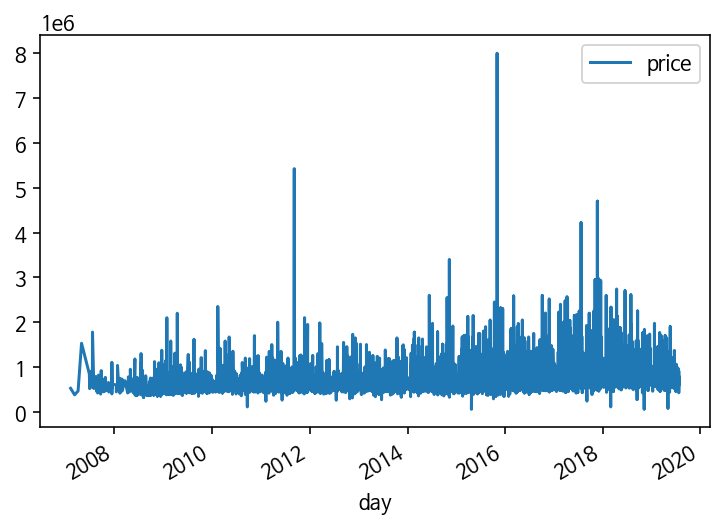

In [ ]:
# 시각화
train_df.plot()
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model = ARIMA(train_df.values, order=(2, 1, 2))
model

In [ ]:
model_fit = model.fit(trend='c', full_output=True, disp=True)
model_fit

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                10411
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -144528.542
Method:                       css-mle   S.D. of innovations         258627.053
Date:                Fri, 10 Dec 2021   AIC                         289069.085
Time:                        07:28:17   BIC                         289112.588
Sample:                             1   HQIC                        289083.781
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.9174     13.055      1.449      0.147      -6.670      44.505
ar.L1.D.y      0.6801      0.067     10.177      0.000       0.549       0.811
ar.L2.D.y     -0.0778      0.017     -4.628      0.000      -0.111      -0.045
ma.L1.D.y     -1.4838      0.066    -22.486      0.000      -1.613      -1.354
ma.L2.D.y      0.4858      0.066      7.392      0.000       0.357       0.615
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8711           +0.0000j            1.8711            0.0000
AR.2            6.8672           +0.0000j            6.8672            0.0000
MA.1            1.0039           +0.0000j            1.0039            0.0000
MA.2            2.0505           +0.0000j            2.0505            0.0000
-----------------------------------------------------------------------------
"""

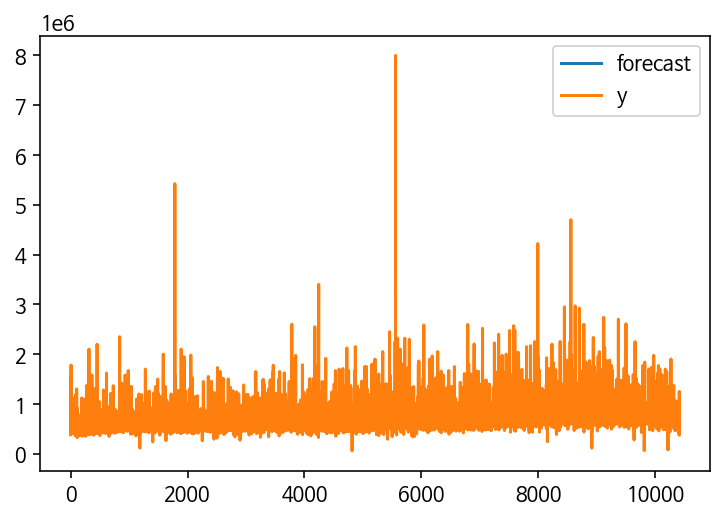

In [ ]:
# 파랑 : 예측, 주황 : 실제
fig = model_fit.plot_predict()

In [ ]:
# 30일치 예측
forecast_data = model_fit.forecast(steps = 30)
forecast_data

(array([737003.95874261, 761465.72395336, 766512.48442117, 768048.3894499 ,
        768707.66926982, 769044.01858211, 769228.9761029 , 769336.10852625,
        769402.09638502, 769446.15973011, 769478.51490989, 769504.61397304,
        769527.36961626, 769548.33837646, 769568.35212974, 769587.85547401,
        769607.08602696, 769626.17078484, 769645.17762159, 769664.1428129 ,
        769683.08574653, 769702.0167844 , 769720.9414645 , 769739.86274665,
        769758.78221274, 769777.70070824, 769796.61868499, 769815.53638449,
        769834.45393581, 769853.37140794]),
 array([258627.05283463, 263561.15778283, 263982.37219275, 264067.42952992,
        264096.40863567, 264109.74068585, 264117.42626584, 264122.75903652,
        264127.01421335, 264130.74382477, 264134.20680643, 264137.53133444,
        264140.78300734, 264143.99605601, 264147.18853871, 264150.37003922,
        264153.54566031, 264156.71812364, 264159.88888224, 264163.05871223,
        264166.22802827, 264169.39705197, 26

In [ ]:
# test
test_df = df[10412:]
len(test_df)

30

In [ ]:
pred_y = forecast_data[0]
pred_y

array([737003.95874261, 761465.72395336, 766512.48442117, 768048.3894499 ,
       768707.66926982, 769044.01858211, 769228.9761029 , 769336.10852625,
       769402.09638502, 769446.15973011, 769478.51490989, 769504.61397304,
       769527.36961626, 769548.33837646, 769568.35212974, 769587.85547401,
       769607.08602696, 769626.17078484, 769645.17762159, 769664.1428129 ,
       769683.08574653, 769702.0167844 , 769720.9414645 , 769739.86274665,
       769758.78221274, 769777.70070824, 769796.61868499, 769815.53638449,
       769834.45393581, 769853.37140794])

In [ ]:
pred_y = pred_y.tolist()

In [ ]:
type(pred_y)

list

In [ ]:
test_df.price.head(1)

day
2012-11-03    1555000
Name: price, dtype: int64

In [ ]:
test_y = test_df.price.values
test_y = test_y.tolist()
type(test_y)

list

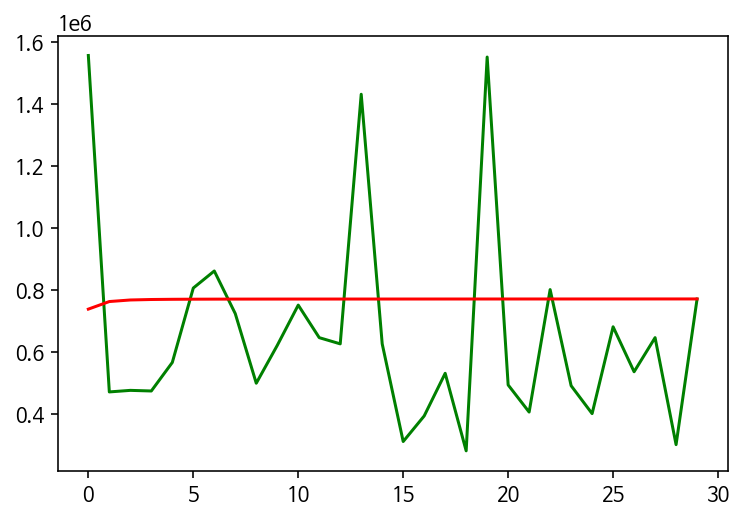

In [ ]:
plt.plot(test_y, color = 'green')
plt.plot(pred_y, color = 'red')

# ARIMA + trend

In [ ]:
from fbprophet import Prophet

In [ ]:
df2 = df.copy()
df2 = df2.reset_index()
df2.columns = ['ds','y']
df2.head()

,ds,y
0,2007-02-07,525000
1,2007-03-09,380000
2,2007-04-04,465000
3,2007-04-30,1530000
4,2007-06-27,850000


In [ ]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, # 연도벌
                 weekly_seasonality=True, # 주차별
                 daily_seasonality=True, # 일자별
                 changepoint_prior_scale=0.5) # scale은 trend 반영 비율(높아지면 많이 반영, overfitting)

In [ ]:
prophet.fit(df2)

In [ ]:
future_data = prophet.make_future_dataframe(periods=30, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2007-02-07,463646.299977,294486.060677,9.597450e+05,463646.299977,463646.299977,0.4572,0.4572,0.4572,0.361679,0.361679,0.361679,-0.081796,-0.081796,-0.081796,-0.013726,-0.013726,-0.013726,0.0,0.0,0.0,631337.277133
1,2007-03-09,460449.066660,338611.836833,9.713211e+05,460449.066660,460449.066660,0.4572,0.4572,0.4572,0.430320,0.430320,0.430320,-0.057117,-0.057117,-0.057117,0.030237,0.030237,0.030237,0.0,0.0,0.0,658589.464038
2,2007-04-04,457678.131119,325909.666994,1.009385e+06,457678.131119,457678.131119,0.4572,0.4572,0.4572,0.469535,0.469535,0.469535,-0.081796,-0.081796,-0.081796,0.094131,0.094131,0.094131,0.0,0.0,0.0,672574.109049
3,2007-04-30,454907.195578,330875.308733,9.796469e+05,454907.195578,454907.195578,0.4572,0.4572,0.4572,0.445384,0.445384,0.445384,-0.027289,-0.027289,-0.027289,0.015473,0.015473,0.015473,0.0,0.0,0.0,657515.662264
4,2007-06-27,448725.877832,264313.548110,9.008224e+05,448725.877832,448725.877832,0.4572,0.4572,0.4572,0.318888,0.318888,0.318888,-0.081796,-0.081796,-0.081796,-0.056517,-0.056517,-0.056517,0.0,0.0,0.0,591819.070230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,2019-08-22,539031.527550,372843.731260,1.049297e+06,539031.527550,539031.527550,0.4572,0.4572,0.4572,0.308116,0.308116,0.308116,-0.073214,-0.073214,-0.073214,-0.075870,-0.075870,-0.075870,0.0,0.0,0.0,705115.670833
3085,2019-08-23,538971.574190,395601.294129,1.055987e+06,538971.574190,538971.574190,0.4572,0.4572,0.4572,0.327945,0.327945,0.327945,-0.057117,-0.057117,-0.057117,-0.072138,-0.072138,-0.072138,0.0,0.0,0.0,715724.378836
3086,2019-08-24,538911.620830,492655.755980,1.170988e+06,538911.620830,538911.620830,0.4572,0.4572,0.4572,0.533993,0.533993,0.533993,0.144783,0.144783,0.144783,-0.067991,-0.067991,-0.067991,0.0,0.0,0.0,826686.471793
3087,2019-08-25,538851.667470,522942.161686,1.169048e+06,538851.667470,538851.667470,0.4572,0.4572,0.4572,0.577978,0.577978,0.577978,0.184310,0.184310,0.184310,-0.063532,-0.063532,-0.063532,0.0,0.0,0.0,850296.295919


In [ ]:
forecast_data[['ds', 'yhat', 'yhat_lower','yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
3084,2019-08-22,705115.670833,372843.731260,1.049297e+06
3085,2019-08-23,715724.378836,395601.294129,1.055987e+06
3086,2019-08-24,826686.471793,492655.755980,1.170988e+06
3087,2019-08-25,850296.295919,522942.161686,1.169048e+06
3088,2019-08-26,738707.655857,396485.732962,1.043521e+06


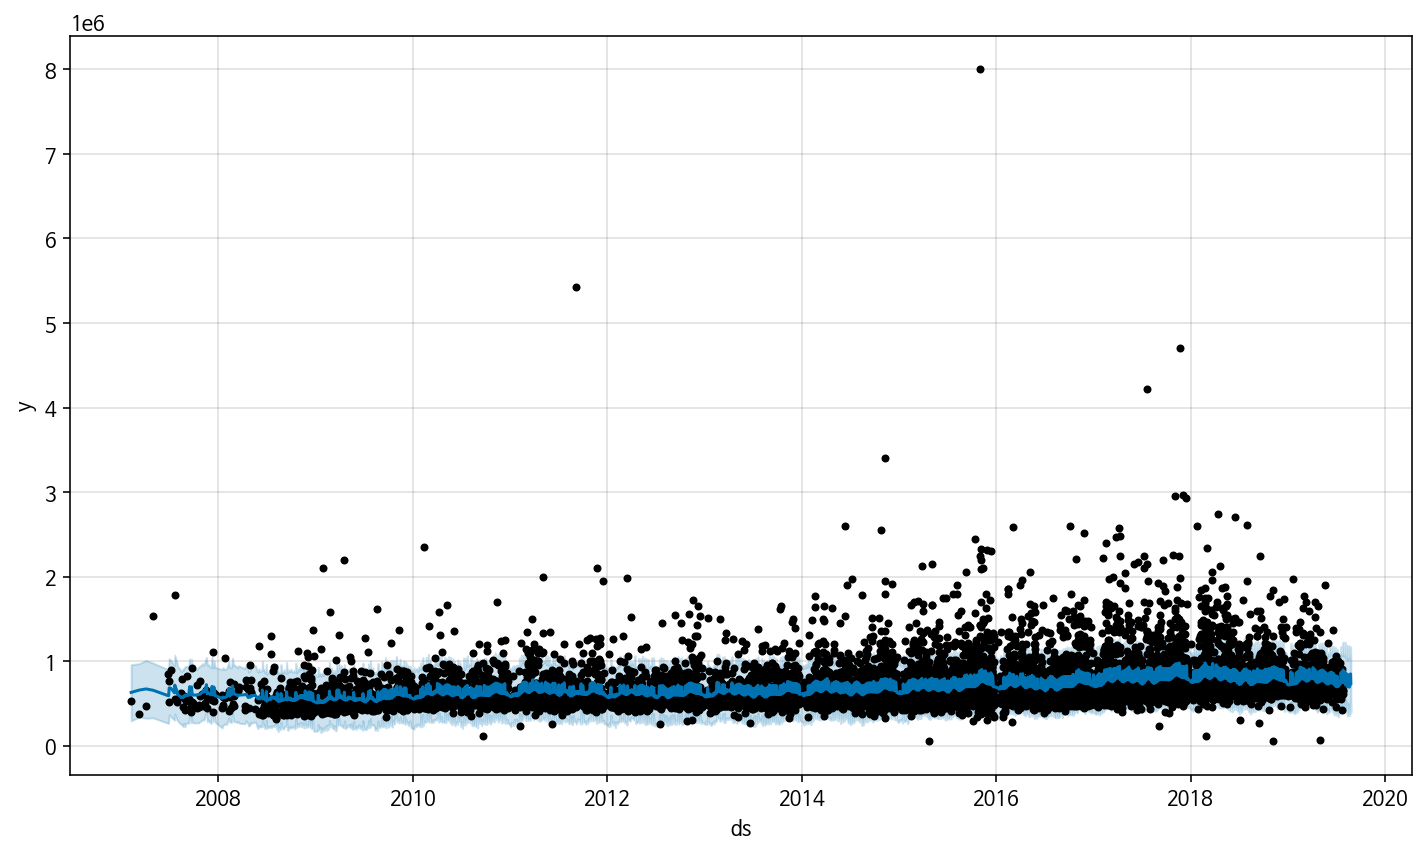

In [ ]:
fig1 = prophet.plot(forecast_data)

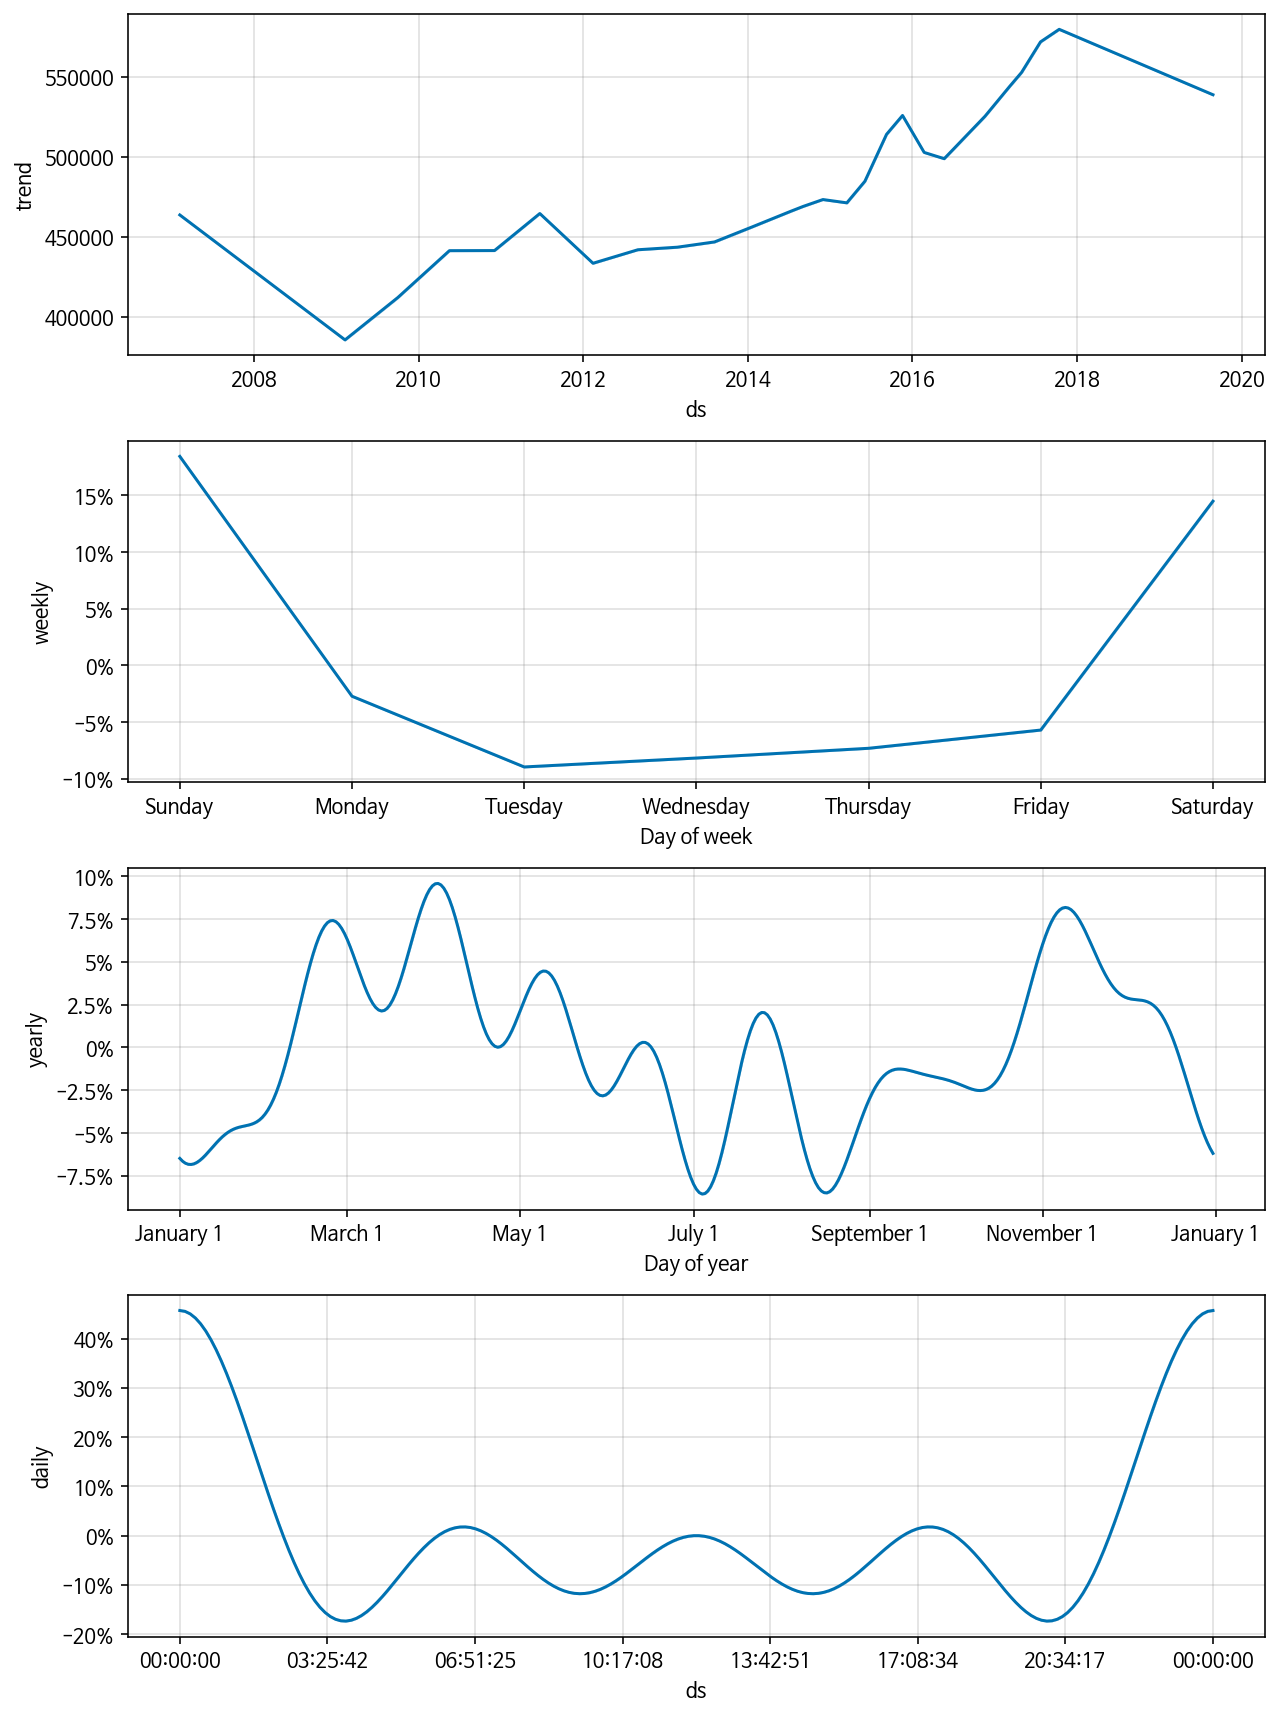

In [ ]:
fig2 = prophet.plot_components(forecast_data)